# Market Analysis in Dublin

## Outline

- [Objectives](#objectives)
- [Setup](#setup)
- [`searches` Dataset](#searches-data)
    - [Most Popular Search Options for Number of Guests](#number-guests)
    - [Time Range of Searches](#time-range-searches)
    - [Maximum Price of Search Filter](#filter-price-max)
    - [Length of Preparation](#length-preparation)
    - [Most Popular Number of Nights Searched For](#number-nights)
    - [Most Popular Months of Check In](#checkin-months)
    - [Most Popular Room Types](#room-types)
    - [Top Countries for Search Origins](#countries-search)
- [`contacts` Dataset](#contacts-data)
    - [Number of Guests who Stayed](#guests-stayed)
    - [Conversion Rate from Accepting to Booking](#conversion-rate)
    - [Time Range of Guests Acceptance or Rejection](#time-acceptance)
- [Merged Dataset](#merged-data)
    - [Difference in Prices Searched between Accepted and Rejected Applicants](#diff-price-acceptance)
    - [Acceptance Rates by Price Class](#acceptance_rate)
    - [Acceptance Rates by Country of Origin](#acceptance-rate-country)

## Objectives <a id='objectives'></a>

The task is to analyze, visualize, and communicate the supply and demand of the Airbnb market in Dublin.

The following questions will be answered:

- What are guests searching for in Dublin?
- Which inquiries do hosts tend to accept?
- What gaps exist between guest demand and host supply?
- Is there additional information that would enhance understanding of the data?

## Setup <a id='setup'></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
contacts = pd.read_csv('data/raw/contacts.tsv', sep='\t')
searches = pd.read_csv('data/raw/searches.tsv', sep='\t')

## `searches` Dataset <a id='searches-data'></a>

In [3]:
# Information on searches DataFrame
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ds                    35737 non-null  object 
 1   id_user               35737 non-null  object 
 2   ds_checkin            23888 non-null  object 
 3   ds_checkout           23888 non-null  object 
 4   n_searches            35737 non-null  int64  
 5   n_nights              23888 non-null  float64
 6   n_guests_min          35737 non-null  int64  
 7   n_guests_max          35737 non-null  int64  
 8   origin_country        35737 non-null  object 
 9   filter_price_min      13322 non-null  float64
 10  filter_price_max      13322 non-null  float64
 11  filter_room_types     16191 non-null  object 
 12  filter_neighborhoods  1346 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [4]:
# Show first 5 rows of searches
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [5]:
# Find percentage of null values in data
print(f'Percentage of null values in searches data:\n{searches.isna().sum()/len(searches)}')

Percentage of null values in searches data:
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64


The `filter_neighborhoods` column in the `searches` data has around 96% null values. Keeping these values could result in inaccurate assumptions about the guest demand.

In [6]:
# Check filter_neighborhoods column
searches['filter_neighborhoods'].value_counts()

filter_neighborhoods
,City Centre                                                                                                                                                     719
,City Centre,Old City                                                                                                                                             46
,Temple Bar                                                                                                                                                       42
City Centre                                                                                                                                                       33
,City Centre,Temple Bar                                                                                                                                           29
                                                                                                                                                          

'City Centre' is a popular choice, and should be investigated further with more data.

In [7]:
# Drop filter_neighborhoods column
searches = searches.drop(columns='filter_neighborhoods')

In [8]:
# Convert date columns to datetime data type
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

In [9]:
# Create length_preparation feature to measure how soon guests want to check in
searches['length_preparation'] = searches['ds_checkin'] - searches['ds']

In [10]:
# Summary statistics for searches
searches.describe()

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preparation
count,35737,23888,23888,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,2014-10-07 14:32:34.478551552,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00
std,NaN,NaN,NaN,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518


### Most Popular Search Options for Number of Guests <a id='number-guests'></a>

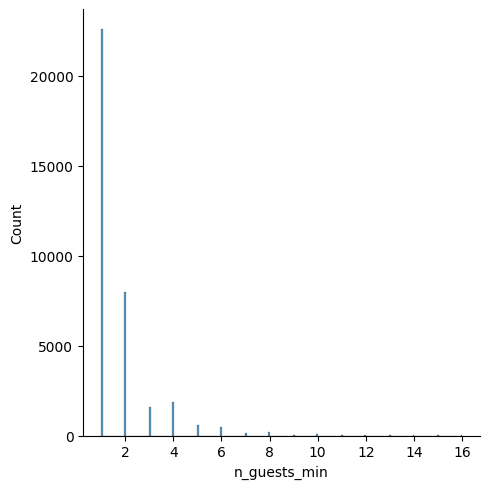

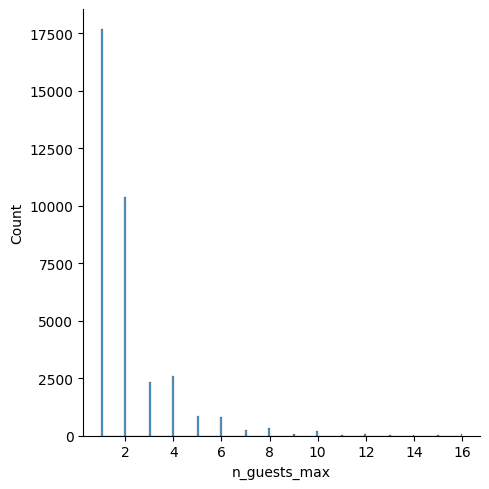

In [11]:
# Distribution plot of n_guests_min and n_guests_max
_ = sns.displot(data=searches, x='n_guests_min')
_ = sns.displot(data=searches, x='n_guests_max')

- Both columns have similar distributions.
- 1 guest is the most popular option, followed by 2 guests.
- Smaller accommodations may be preferred.

### Time Range of Searches <a id='time-range-searches'></a>

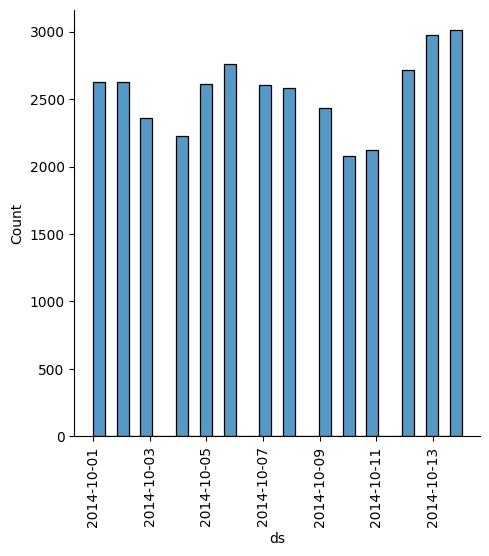

In [12]:
# Time range of when searches were conducted
ax = sns.displot(data=searches, x='ds')
_ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

- All of the searches occurred between October 1 and October 13 in 2014.
- There are no major variations in this distribution of search dates.

### Maximum Price of Search Filter <a id='filter-price-max'></a>

The `filter_price_max` feature will be used instead of `filter_price_min` because the minimum can be set to `$0`.

In [13]:
# Percentage of dataset with filter_price_max above 600
print(len(searches[searches['filter_price_max'] > 600]) / len(searches['filter_price_max']) * 100, '%')

5.311022189887232 %


The threshold of 600 will be used because a small percentage of the dataset has values greater than 600.

To aid in visualizing the overall trend, the `filter_price_max` feature will be set to less than or equal to 600.

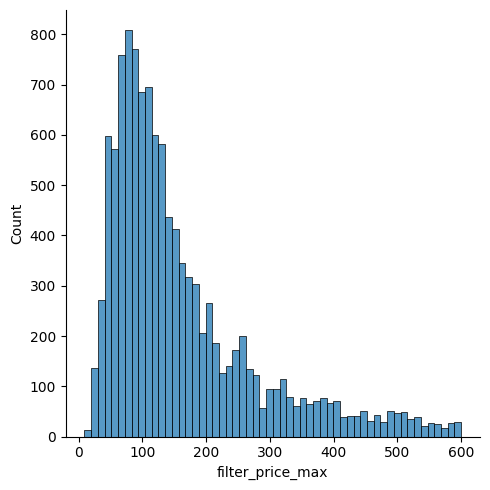

In [14]:
# Distribution plot of filter_price_max of searches with upper limit removed
_ = sns.displot(x=searches[searches['filter_price_max'] <= 600]['filter_price_max'])

### Length of Preparation <a id='length-preparation'></a>

In [15]:
# Percentage of dataset where length_preparation is over 100 days
distribution = searches['length_preparation'] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100]) / len(distribution) * 100, '%')

9.396423874415872 %


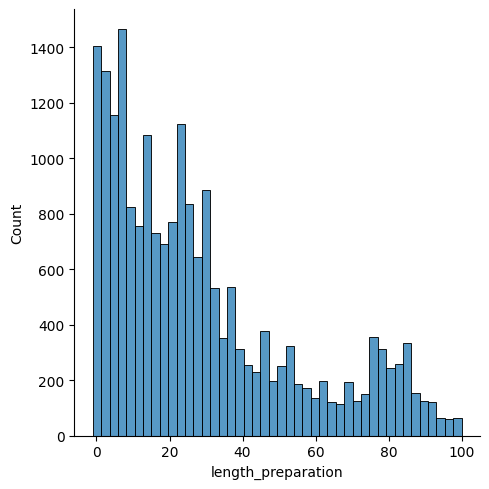

In [16]:
# Distribution plot of length_preparation with upper limit removed
_ = sns.displot(x=distribution[distribution <= 100])

### Most Popular Number of Nights Searched For <a id='number-nights'></a>

In [17]:
# Percentage of dataset where n_nights is over 20 nights
print(len(searches[searches['n_nights'] > 20]) / len(searches['n_nights']) * 100, '%')

4.737387021854101 %


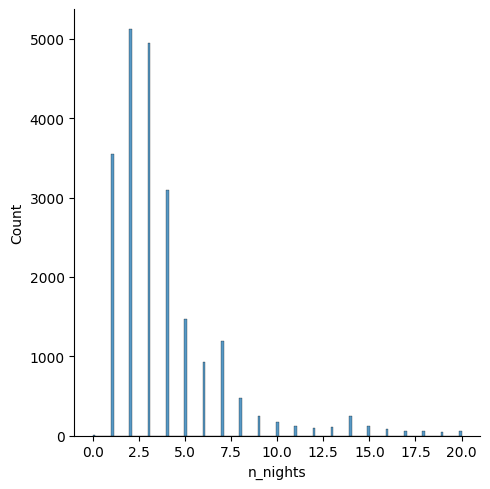

In [18]:
# Distribution plot of n_nights with upper limit removed
_ = sns.displot(x=searches[searches['n_nights'] <= 20]['n_nights'])

In [19]:
# Mean number of nights, after removing upper limit
searches[searches['n_nights'] <= 20]['n_nights'].mean()

3.8049560711872044

### Most Popular Months of Check In <a id='checkin-months'></a>

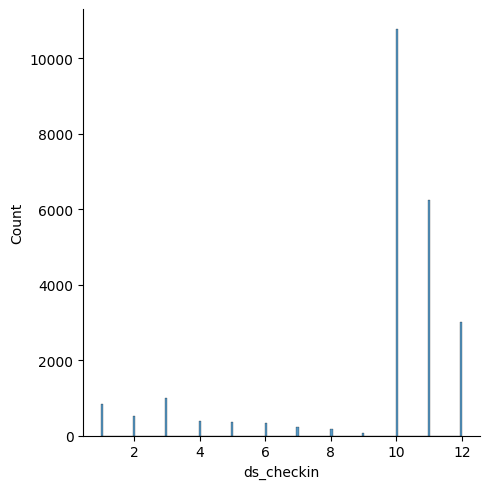

In [20]:
# Distribution of months of ds_checkin
_ = sns.displot(x=searches['ds_checkin'].dt.month)

### Most Popular Room Types <a id='room-types'></a>

In [21]:
# Show first 15 unique values
searches['filter_room_types'].unique()[0:15]

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

According to Airbnb, there are only 4 values in the type of place:

- Entire home/apt
- Private room
- Shared room
- Hotel room

In [22]:
# Define valid values
valid_values = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

In [23]:
# Function to find most frequent valid value in a string
def most_frequent_valid_value(s):
    """
    Return the valid value with the highest count in a string.
    """
    # Check for NaN values because `count` method is not applicable to float objects
    if pd.isna(s):
        return np.nan

    # Count occurrences using list comprehension
    occurrences = [s.count(value) for value in valid_values]
    
    # Find the most frequent valid value
    max_index = occurrences.index(max(occurrences))
    
    return valid_values[max_index]

In [24]:
# Clean column and keep most frequent valid value
searches['filter_room_types'] = searches['filter_room_types'].apply(most_frequent_valid_value)

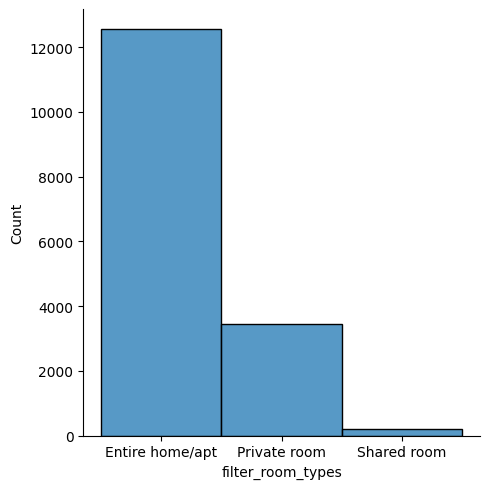

In [25]:
# Distribution of filter_room_types_cleaned
_ = sns.displot(x=searches['filter_room_types'])

- The most requested room type was 'Entire home/apt'.
- The second most requested room type was 'Private room'.

### Top Countries for Search Origins <a id='countries-search'></a>

In [26]:
# Find top 15 countries where searches originate from
search_origin = searches.groupby(by='origin_country').agg(count=('origin_country', 'count')).nlargest(n=15, columns='count')
search_origin

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


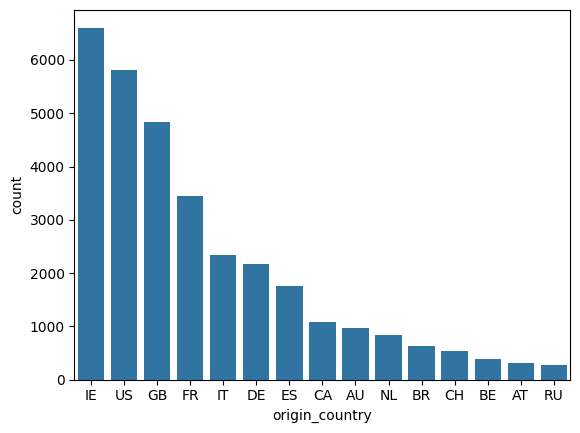

In [27]:
# Bar plot of top 15 countries of origin for searches
_ = sns.barplot(data=search_origin, x='origin_country', y='count')

- Most of the searches originated from Ireland (IE), the United States (US), and the United Kingdom (UK / GB).

 ## `contacts` Dataset <a id='contacts-data'></a>

In [28]:
# Information on contacts DataFrame
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [29]:
# Find percentage of null values in data
print(f'Percentage of null values in contacts data:\n{contacts.isna().sum()/len(contacts)}\n')

Percentage of null values in contacts data:
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64



In [30]:
# Show first 5 rows of contacts
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [31]:
# Convert date columns to datetime data type
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])

In [32]:
# Create new features
contacts['accepted'] = pd.notna(contacts['ts_accepted_at'])
contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

In [33]:
# Check data types
contacts.dtypes

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

In [34]:
# Summary statistics
contacts.describe()

,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


In [35]:
# Calculate skewness in contacts data
contacts.skew(axis=0, numeric_only=True, skipna=True)

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

- The `n_guests` and `n_messages` columns have a Pearson coefficient value greater than 1.
- The `accepted` column has a Pearson coefficient value less than 1, which may be due to being derived from an existing column.

In the next section, the Box-Cox transformation method will be used to reduce skewness for the `n_guests` and `n_messages` features in a merged dataset containing `searches` and `contacts` data.

### Number of Guests who Stayed <a id='guests-stayed'></a>

In [36]:
# Find percentages of contacts dataset for n_guests
((contacts['n_guests'].value_counts()) / len(contacts)) * 100

n_guests
2     44.254122
1     27.022881
4     11.121053
3      8.947974
6      3.502493
5      2.901700
7      0.792535
8      0.703055
10     0.306788
12     0.191742
16     0.063914
11     0.063914
15     0.051131
13     0.038348
9      0.038348
Name: count, dtype: float64

Most of the data is represented by less than 8 guests so to better visualize the majority distribution, rows with 8 or more guests will be removed.

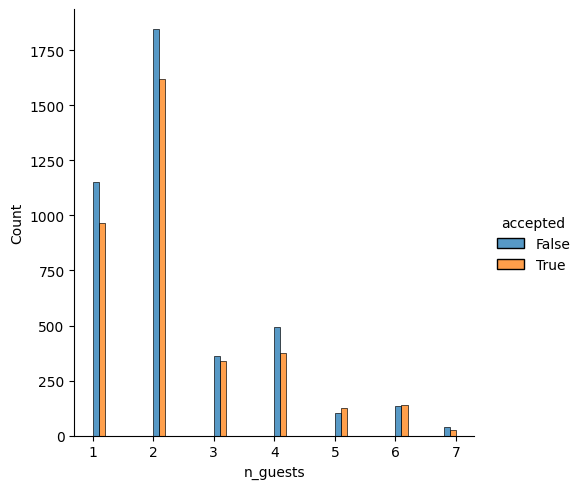

In [37]:
# Number of guests who stayed with upper limit removed
_ = sns.displot(data=contacts[contacts['n_guests'] < 8], x='n_guests', hue='accepted', multiple='dodge')

- The most popular booking option is for 2 guests.
- However, as per the plots in the previous section, the most popularly searched option is for 1 guest.
- This may indicate a lack of supply of rooms for 1 guest.

### Conversion Rate from Accepting to Booking <a id='conversion-rate'></a>

In [38]:
# Conversion rate from accepting to booking
print(f'Conversion rate from accepting to booking: {contacts.ts_booking_at.count() / contacts.ts_accepted_at.count() * 100}%.')

Conversion rate from accepting to booking: 59.93934381031155%.


### Time Range of Guests Acceptance or Rejection <a id='time-acceptance'></a>

In [39]:
# Get month from check in date
contacts['ds_checkin_month'] = contacts['ds_checkin'].dt.month

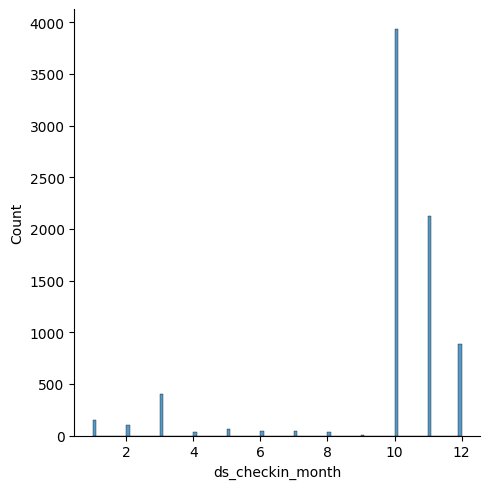

In [40]:
# Distribution plot of check in dates
_ = sns.displot(data=contacts, x='ds_checkin_month')

- The peak season months were October, November, and December.

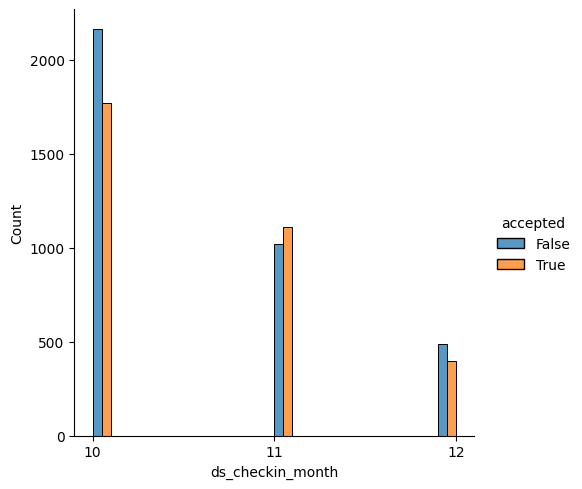

In [41]:
# Distribution plot of check in dates by acceptance during peak season
sns.displot(data = contacts[contacts['ds_checkin_month'] > 9], x='ds_checkin_month', hue='accepted', multiple='dodge')
plt.xticks(ticks=[10, 11, 12])
plt.show()

- October was the most popular month for guest check ins.
- In October and December, there were more guests rejected than accepted.
- In November, there were more guests accepted than rejected.

## Merged Dataset <a id='merged-data'></a>

In [42]:
# Merge datasets for more analysis
merged_df = contacts.merge(right=searches, how='inner', left_on='id_guest', right_on='id_user')

### Difference in Prices Searched between Accepted and Rejected Applicants <a id='diff-price-acceptance'></a>

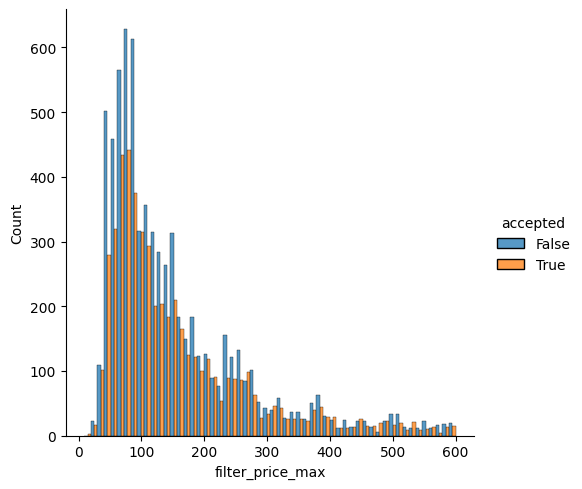

In [43]:
# Plot difference in prices searched between accepted and rejected applicants
_ = sns. displot(data=merged_df[merged_df['filter_price_max'] <= 600], x='filter_price_max', hue='accepted', multiple='dodge')

### Acceptance Rates by Price Class <a id='acceptance_rate'></a>

In [44]:
# Create class_max_price for classifying dataset based on filter_price_max
merged_df['class_max_price'] = pd.cut(x=merged_df['filter_price_max'], bins=[0, 100, 200, 300, 400, 500, 600, np.inf], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600+'])

In [45]:
# Calculate mean acceptance rates for price classes
merged_df.groupby(by='class_max_price', observed=True)['accepted'].mean()

class_max_price
0-100      0.413148
100-200    0.429932
200-300    0.427129
300-400    0.452174
400-500    0.485549
500-600    0.419463
600+       0.434903
Name: accepted, dtype: float64

- Across the price classes, the acceptance rate is similar.
- Overall, more applicants are rejected rather than being approved by hosts.

### Acceptance Rates by Country of Origin <a id='acceptance-rate-country'></a>

In [46]:
# Find acceptance rate by country
(merged_df.groupby(by='origin_country').agg(count_accepted=('accepted', 'sum'), count_country=('accepted', 'count'))
        .query(expr='count_country >= 100')
        .assign(acceptance_rate=lambda x: x['count_accepted'] / x['count_country'])
        .sort_values(by='acceptance_rate'))

,count_accepted,count_country,acceptance_rate
origin_country,,,
IN,138,874,0.157895
HR,159,530,0.300000
AT,83,239,0.347280
RU,83,239,0.347280
IT,1183,3137,0.377112
AE,59,154,0.383117
CA,407,993,0.409869
IE,1217,2951,0.412403
ES,794,1914,0.414838


- India has the lowest acceptance rate at around 16%.
- The second ranked country has nearly twice the acceptance rate of India. This should be investigated further.

This notebook was inspired by the [Market Analysis in Dublin](https://platform.stratascratch.com/data-projects/market-analysis-dublin) data project on [StrataScratch](https://www.stratascratch.com/).